# Pymaceuticals Inc.
---

### Analysis


 

In [ ]:
# 1. There has a  strong positive correlation (0.84) between mouse weight and the volume of tumor. 
# 2. The bar chart showed treatment Capomulin have the most number of mouse and treatment Propriva have the fewest counts of mouse.
# 3. According to the selected treatments, the boxplot shows Capomulin and Ramicane reduces the size of tumors most.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [43]:
# Checking the number of mice.
number = len(df["Mouse ID"].unique())
number

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate.unique()

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = df.loc[df['Mouse ID']=="g989", :]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID']!="g989",:]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [24]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"]

mean =drug.mean()

median = drug.median()

variance = drug.var()

standard = drug.std()
sem = drug.sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,
                           "Tumor Volume Variance":variance,
                          "Tumor Volume Std. Dev.":standard,
                           "Tumor Volume Std. Err.":sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

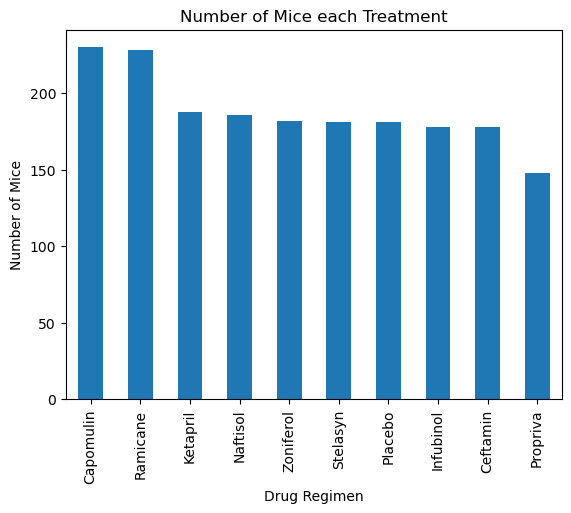

In [93]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count = clean_df['Drug Regimen'].value_counts()
panda_bar = count.plot(kind='bar')
panda_bar
plt.title('Number of Mice each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

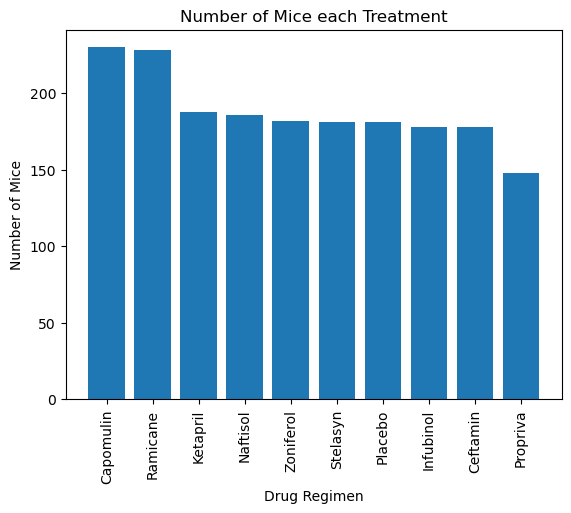

In [94]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count = clean_df['Drug Regimen'].value_counts()
index = list(count.index)
x_axis = np.arange(0, len(drug), 1)
plt.bar(x_axis, count, align="center")
plt.xticks(x_axis, index, rotation=90)
plt.title('Number of Mice each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


<AxesSubplot:ylabel='Sex'>

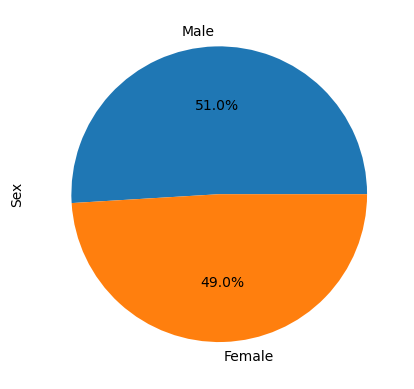

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = clean_df['Sex'].value_counts()
panda_pie = count.plot(kind='pie',  autopct='%1.1f%%')
panda_pie


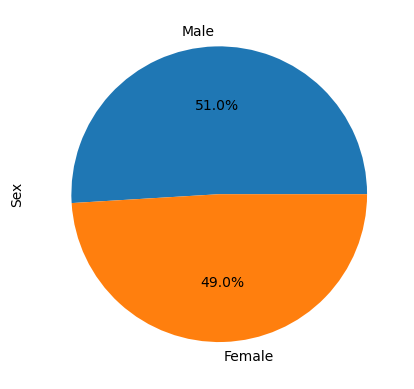

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = clean_df['Sex'].value_counts()
labels = list(count.index)
plt.pie(count, autopct='%1.1f%%', labels=labels)
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df['Drug Regimen']=='Capomulin',:]
ramicane = clean_df.loc[clean_df['Drug Regimen']=='Ramicane',:]
infubinol= clean_df.loc[clean_df['Drug Regimen']=='Infubinol',:]
ceftamin= clean_df.loc[clean_df['Drug Regimen']=='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin.groupby("Mouse ID").max()['Timepoint']
capomulin_df = pd.DataFrame(capomulin_last)

ramicane_last = ramicane.groupby("Mouse ID").max()['Timepoint']
ramicane_df = pd.DataFrame(ramicane_last)

infubinol_last = infubinol.groupby("Mouse ID").max()['Timepoint']
infubinol_df = pd.DataFrame(infubinol_last)

ceftamin_last = ceftamin.groupby("Mouse ID").max()['Timepoint']
ceftamin_df = pd.DataFrame(ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_df,clean_df, on=("Mouse ID", "Timepoint"), 
                    how="left")
ramicane_merge = pd.merge(ramicane_df,clean_df, on=("Mouse ID", "Timepoint"), 
                    how="left")
infubinol_merge = pd.merge(infubinol_df,clean_df, on=("Mouse ID", "Timepoint"), 
                    how="left")
ceftamin_merge = pd.merge(ceftamin_df,clean_df, on=("Mouse ID", "Timepoint"), 
                    how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes

In [130]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments = [capomulin_merge["Tumor Volume (mm3)"], ramicane_merge["Tumor Volume (mm3)"],
             infubinol["Tumor Volume (mm3)"],ceftamin_merge["Tumor Volume (mm3)"]]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in treatments:
    quartiles = i.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    print(iqr)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    capomulin_vol = i
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")   

7.781863460000004
9.098536719999998
10.002090667500006
15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


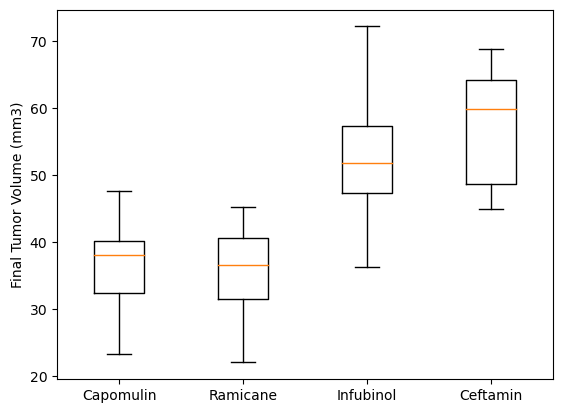

In [163]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_plot = [capomulin_merge["Tumor Volume (mm3)"], ramicane_merge["Tumor Volume (mm3)"],
             infubinol["Tumor Volume (mm3)"],ceftamin_merge["Tumor Volume (mm3)"]]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(data_plot, labels=labels, vert=True, widths = 0.4)
plt.show()

## Line and Scatter Plots

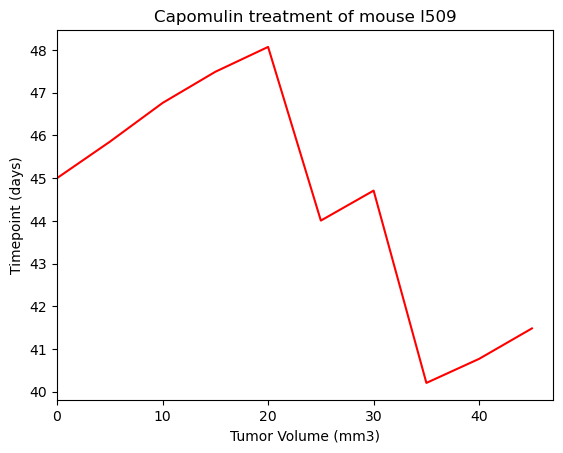

In [152]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = df.loc[df['Mouse ID'] == "l509",:]
x_axis = mouse_l509["Timepoint"]
volume = mouse_l509["Tumor Volume (mm3)"]
fig, ax = plt.subplots()
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint (days)")
plt.xlim(0, max(x_axis)+2)
plt.plot(x_axis, volume, color="r")
plt.show()



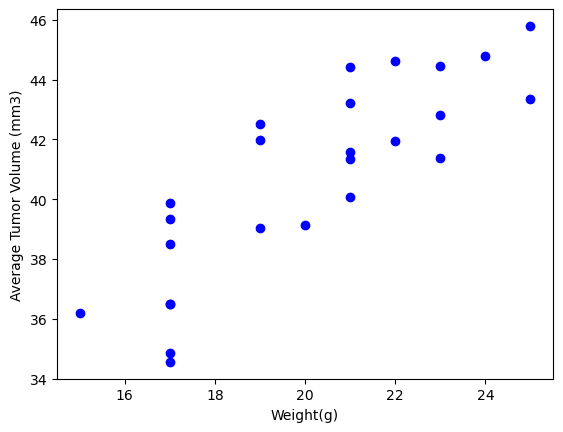

In [156]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weights = capomulin.groupby("Mouse ID")["Weight (g)"].mean()
tumor = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(weights, tumor, color="blue")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


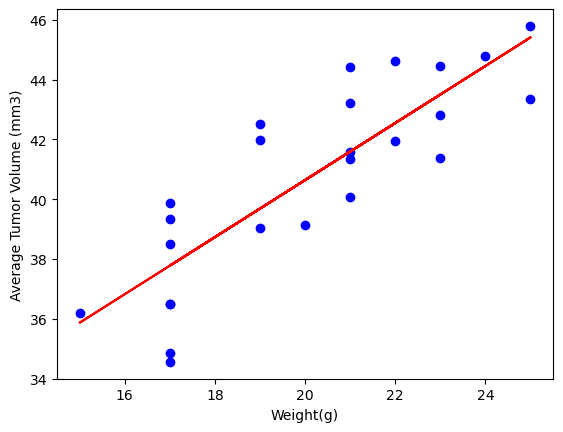

In [162]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(weights , tumor)[0],2)

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(weights, tumor)
regress = weights*slope + intercept
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

plt.scatter(weights, tumor, color="blue")
plt.plot(weights, regress, color="red")

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()